# Keras Regression Code Along Project

Let's now apply our knowledge to a more realistic data set. Here we will also focus on feature engineering and cleaning our data!

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('08_kc_house_data-1.csv')

# Exploratory Data Analysis

In [3]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<ipython-input-5-41b240a38a09>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

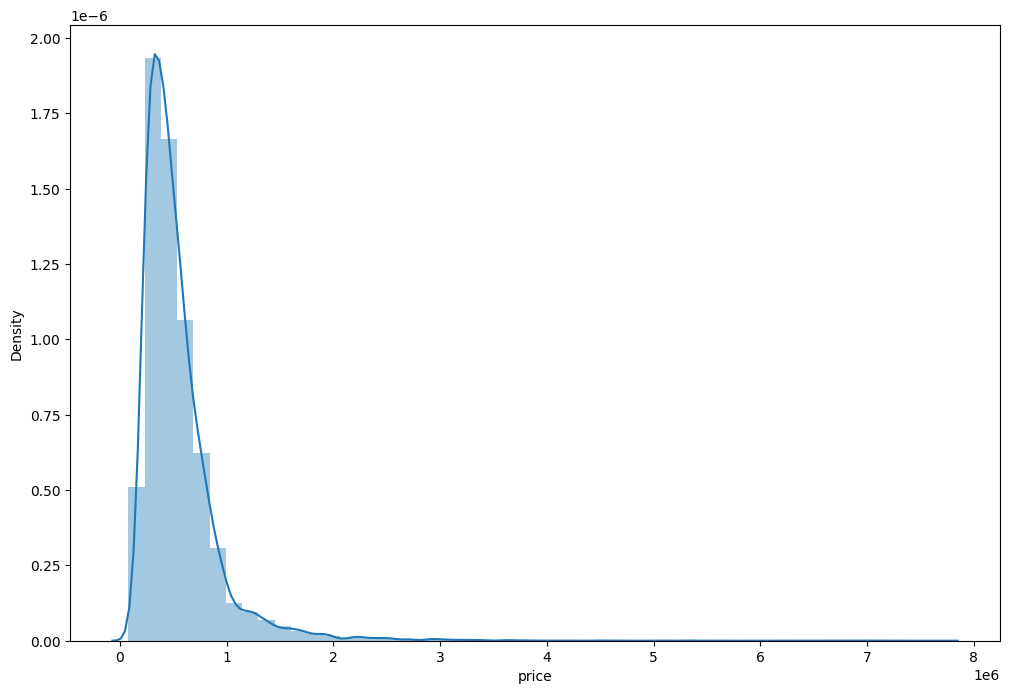

In [5]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

<Axes: ylabel='count'>

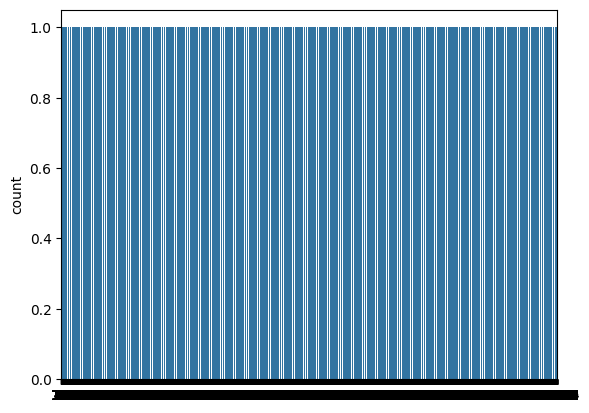

In [ ]:
sns.countplot(df['bedrooms'])

<Axes: xlabel='price', ylabel='sqft_living'>

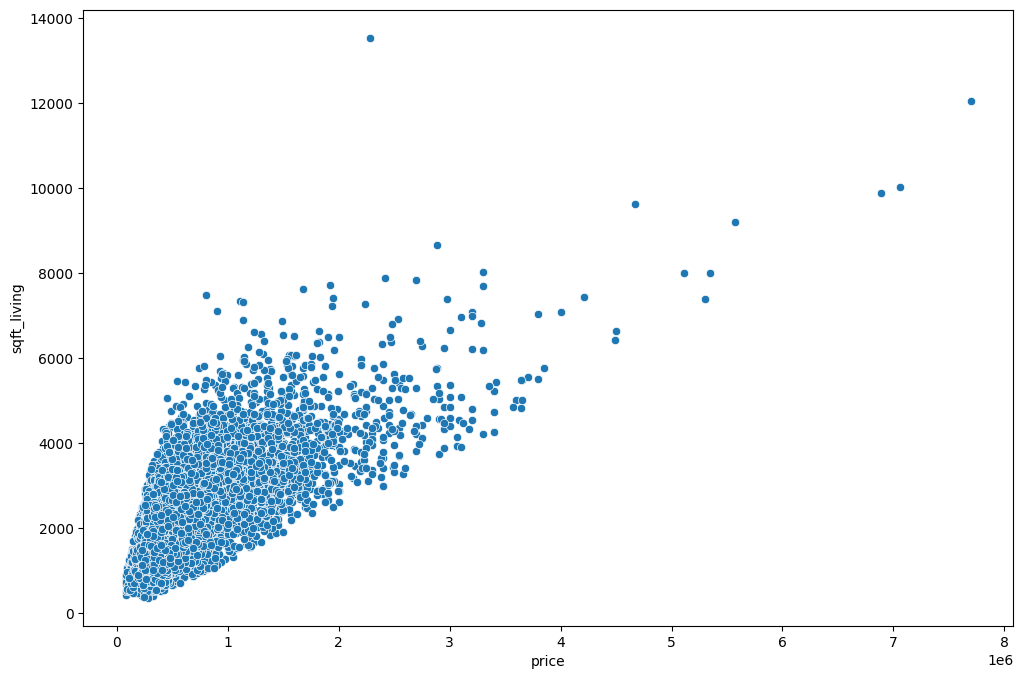

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

<Axes: xlabel='bedrooms', ylabel='price'>

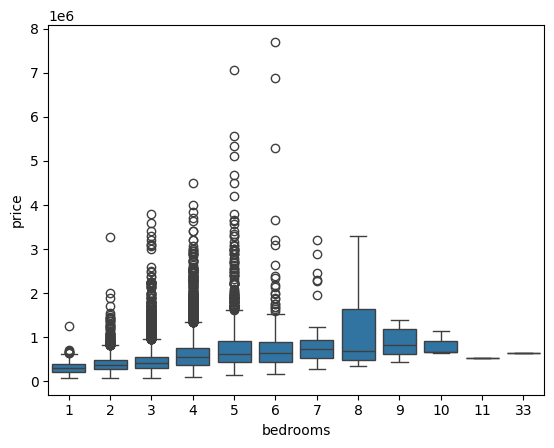

In [ ]:
sns.boxplot(x='bedrooms',y='price',data=df)

### Geographical Properties

<Axes: xlabel='price', ylabel='long'>

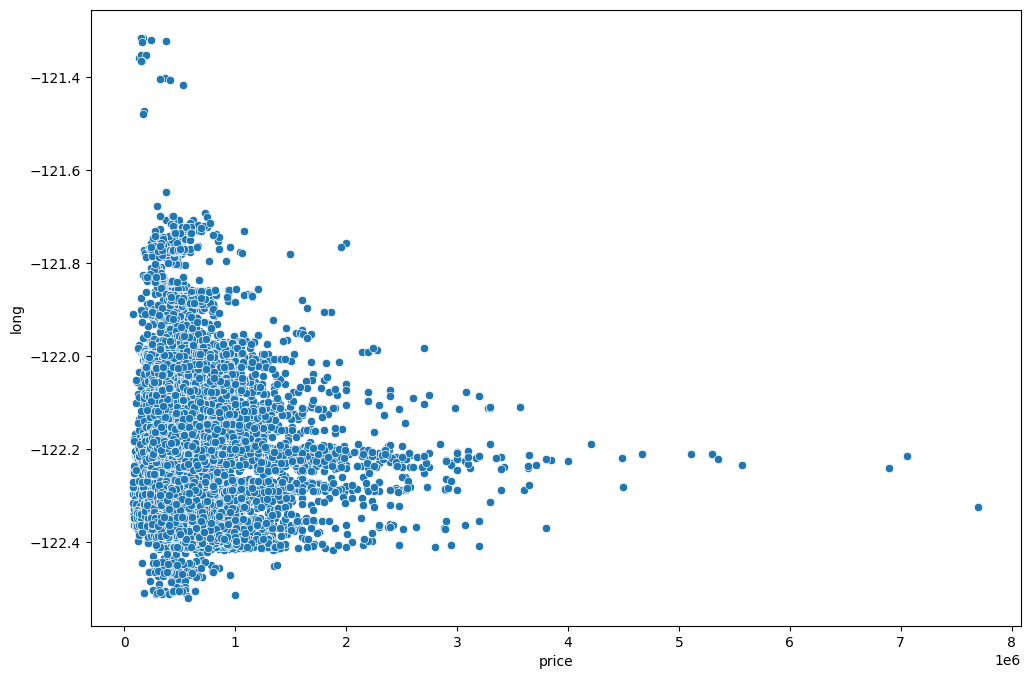

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

<Axes: xlabel='price', ylabel='lat'>

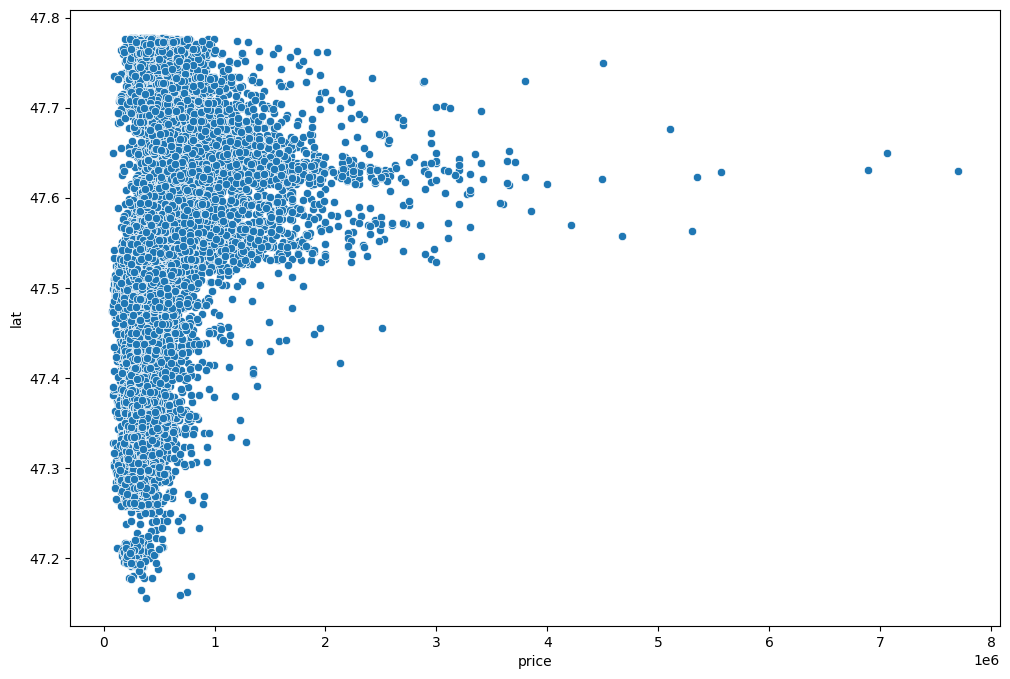

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

<Axes: xlabel='long', ylabel='lat'>

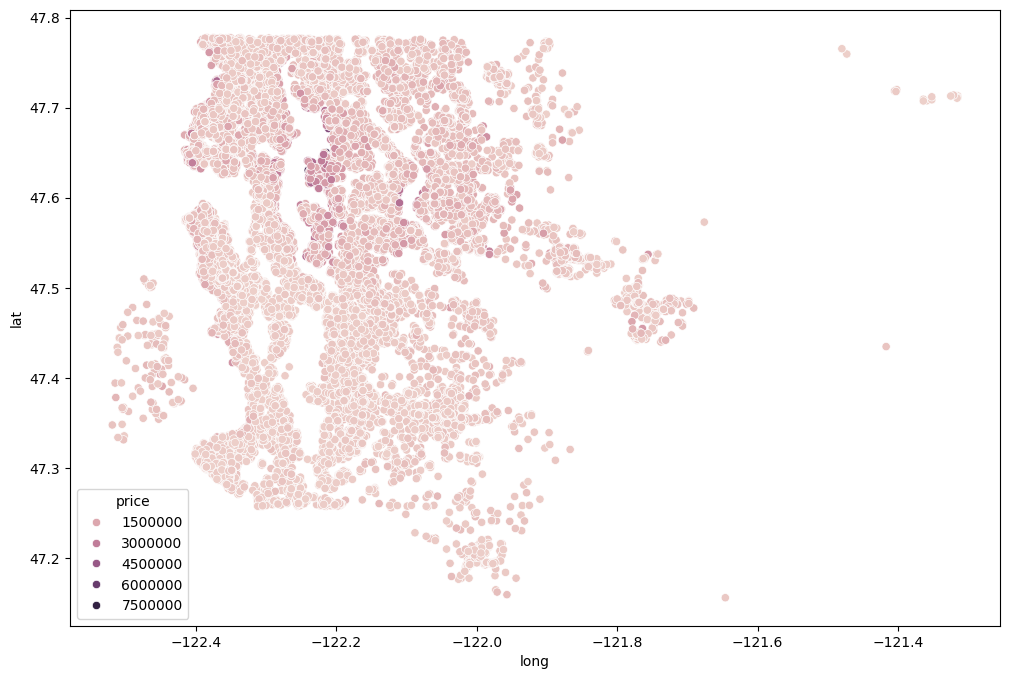

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [6]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [ ]:
len(df)*(0.01)

215.97

In [7]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

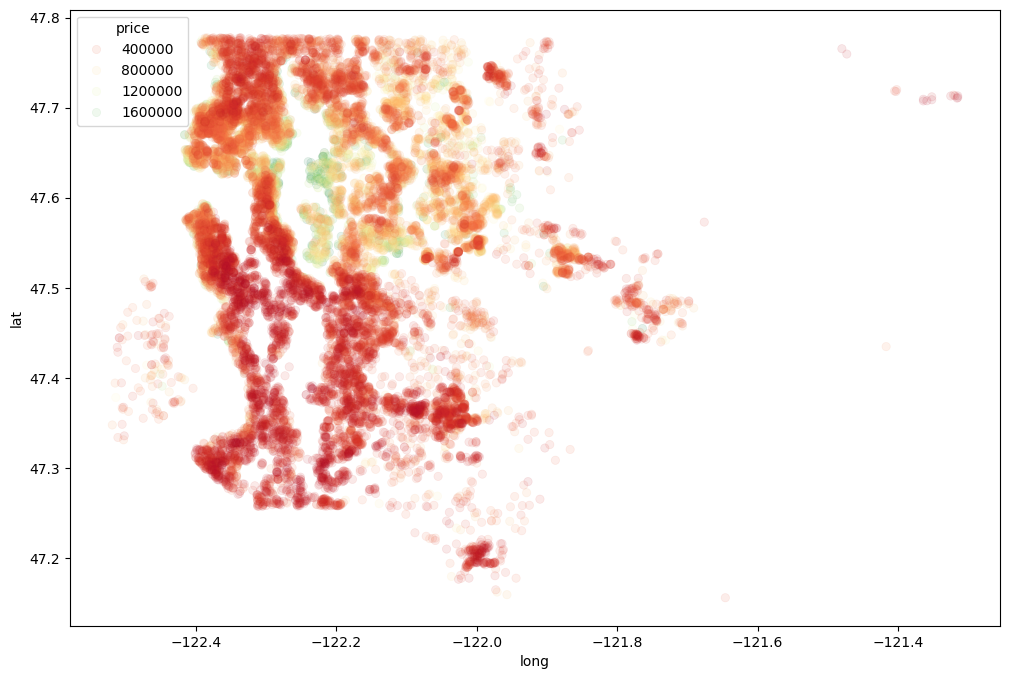

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.1)

### Other Features

<Axes: xlabel='waterfront', ylabel='price'>

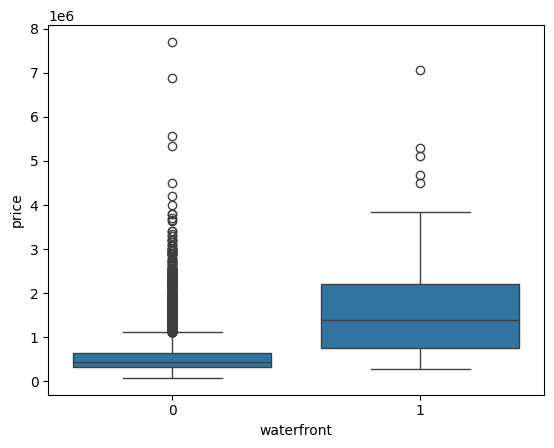

In [9]:
sns.boxplot(x='waterfront',y='price',data=df)

## Working with Feature Data

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [ ]:
df = df.drop('id',axis=1)

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Feature Engineering from Date

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df['month'] = df['date'].apply(lambda date:date.month)

In [12]:
df['year'] = df['date'].apply(lambda date:date.year)

<Axes: xlabel='year', ylabel='price'>

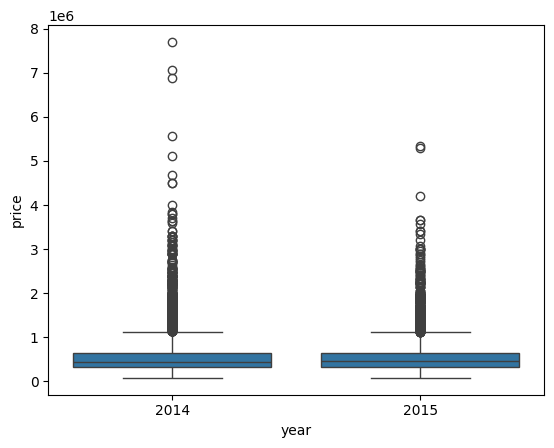

In [13]:
sns.boxplot(x='year',y='price',data=df)

<Axes: xlabel='month', ylabel='price'>

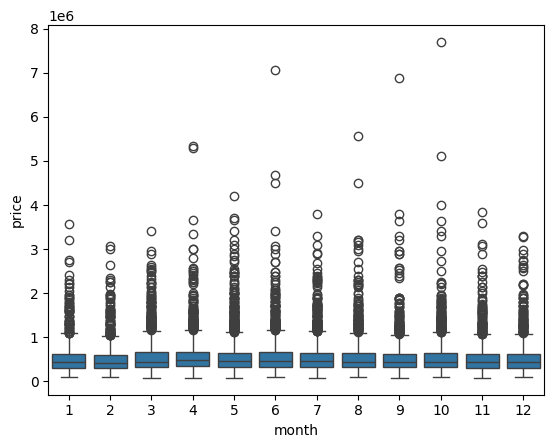

In [14]:
sns.boxplot(x='month',y='price',data=df)

<Axes: xlabel='month'>

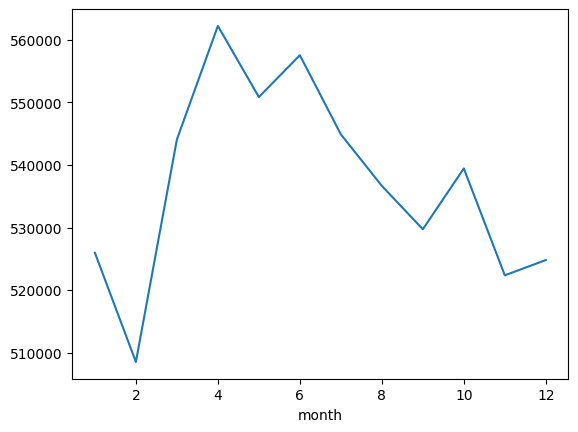

In [ ]:
df.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

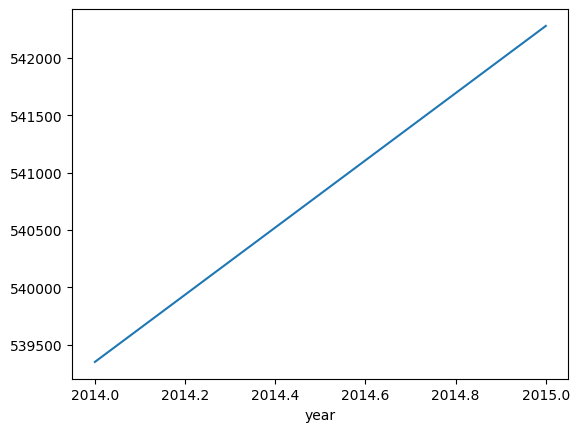

In [ ]:
df.groupby('year').mean()['price'].plot()

In [15]:
df = df.drop('date',axis=1)

In [16]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [17]:
# https://i.pinimg.com/originals/4a/ab/31/4aab31ce95d5b8474fd2cc063f334178.jpg
# May be worth considering to remove this or feature engineer categories from it
df['zipcode'].value_counts()

,count
zipcode,
98103,602
98038,589
98115,583
98052,574
98117,553
...,...
98102,104
98010,100
98024,80


In [18]:
df = df.drop('zipcode',axis=1)

In [19]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [20]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

,count
yr_renovated,
0,20683
2014,91
2013,37
2003,36
2005,35
...,...
1951,1
1959,1
1948,1


In [21]:
df['sqft_basement'].value_counts()

,count
sqft_basement,
0,13110
600,221
700,218
500,214
800,206
...,...
518,1
374,1
784,1


## Scaling and Train Test Split

In [22]:
X = df.drop('price',axis=1)
y = df['price']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
X_train.shape

(15117, 20)

In [28]:
X_test.shape

(6480, 20)

## Creating a Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [30]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [31]:
%%time
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 560593425661952.0000 - val_loss: 229470535680.0000
Epoch 2/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 238626177024.0000 - val_loss: 214857039872.0000
Epoch 3/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 231189626880.0000 - val_loss: 216346640384.0000
Epoch 4/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 226271166464.0000 - val_loss: 214653878272.0000
Epoch 5/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 233655713792.0000 - val_loss: 226200305664.0000
Epoch 6/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 231839399936.0000 - val_loss: 214270509056.0000
Epoch 7/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 236288278528.0000 - val_loss: 215227744256.0000
Epoch 8/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 228801495040.0000 - val_loss: 220597977088.0000
Epoch 9/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 223857491968.0000 - val_loss: 303045214208.0000
Epoch 10/400
119

In [32]:
losses = pd.DataFrame(model.history.history)

<Axes: >

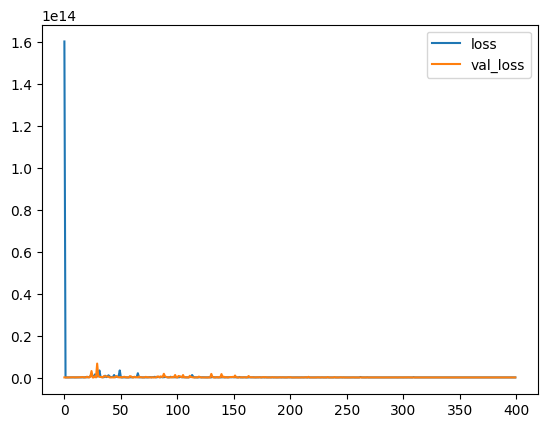

In [33]:
losses.plot()

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

#### Predicting on Brand New Data

In [36]:
X_test

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
15832,1566100130,2,1.00,780,8271,1.0,0,0,4,6,780,0,1924,0,47.7000,-122.300,2220,8271,8,2014
6001,1088030010,4,2.75,2040,8996,1.0,0,0,4,8,1260,780,1974,0,47.6660,-122.185,2470,9180,10,2014
4256,5309101050,3,2.00,1580,4010,1.0,0,0,4,7,790,790,1909,0,47.6769,-122.371,1350,5350,11,2014
15849,5100401315,2,1.00,930,6380,1.0,0,0,4,7,930,0,1940,0,47.6915,-122.321,1180,6380,7,2014
4088,5101407370,3,1.50,1470,9570,1.0,0,0,3,7,1280,190,1941,0,47.7032,-122.306,1390,9570,4,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,5561400470,4,3.25,3410,34939,2.0,0,0,4,9,2470,940,1992,0,47.4590,-122.003,2450,39045,4,2015
17052,8651402750,3,1.50,1210,5200,1.0,0,0,5,6,1210,0,1969,0,47.3615,-122.087,1120,5200,2,2015
10587,7312400075,2,1.00,910,4800,1.0,0,0,4,7,910,0,1923,0,47.5536,-122.377,1450,5000,12,2014
11204,5592900105,4,1.75,2520,7200,1.0,0,2,5,7,1260,1260,1955,0,47.4835,-122.192,2360,7300,2,2015


In [38]:
predictions = model.predict(X_test)

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [40]:
mean_absolute_error(y_test,predictions)

315011.01286914025

In [42]:
np.sqrt(mean_squared_error(y_test,predictions))

466181.8101156565

In [44]:
explained_variance_score(y_test,predictions)

-0.38295196798240916

In [48]:
df['price'].mean()

540296.5735055795

In [50]:
df['price'].median()

450000.0

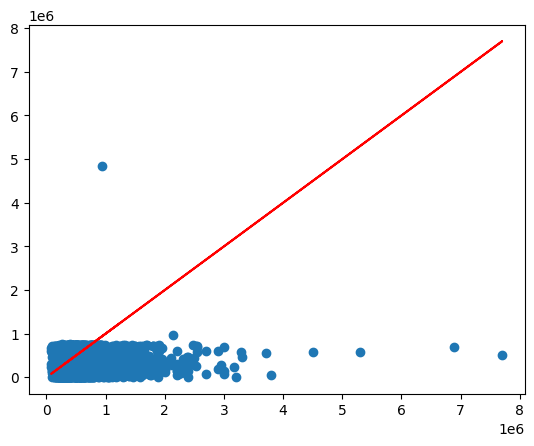

In [59]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [61]:
errors = y_test.values.reshape(6480, 1) - predictions

<ipython-input-62-4a151ca7bc24>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors)


<Axes: ylabel='Density'>

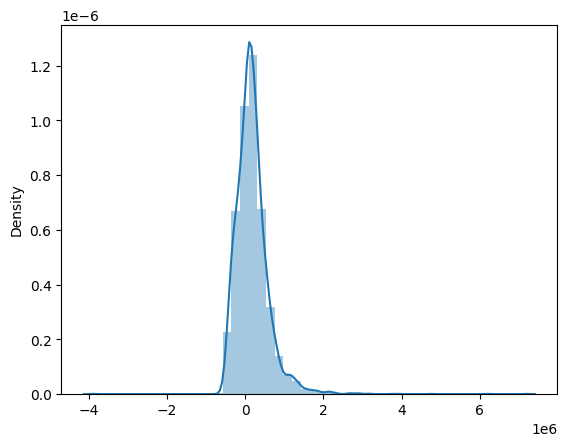

In [62]:
sns.distplot(errors)

-------------
### Predicting on a brand new house

In [64]:
single_house = df.drop('price',axis=1).iloc[0]

In [68]:
single_house

,0
id,7.129301e+09
bedrooms,3.000000e+00
bathrooms,1.000000e+00
sqft_living,1.180000e+03
sqft_lot,5.650000e+03
floors,1.000000e+00
waterfront,0.000000e+00
view,0.000000e+00
condition,3.000000e+00
grade,7.000000e+00


In [70]:
df.iloc[0]

,0
id,7.129301e+09
price,2.219000e+05
bedrooms,3.000000e+00
bathrooms,1.000000e+00
sqft_living,1.180000e+03
sqft_lot,5.650000e+03
floors,1.000000e+00
waterfront,0.000000e+00
view,0.000000e+00
condition,3.000000e+00
